## Problem 1 [Monte Carlo]
Generate n=100 samples of i.i.d 2-dimensional uniform random variables in the unit-square. Count how many of these samples fall within the quarter unit-circle centered at the origin. This quarter circle inscribes the unit square as shown below:
![alt text](problem1pic.png "title")

In [1]:
import numpy as np
sample = np.random.rand(100,2)
dist = map(np.linalg.norm,sample)
print 'The number of samples fall within the quarter unit-circle is',sum(np.array(dist) <= 1)

The number of samples fall within the quarter unit-circle is 80


i.) Use these random samples to estimate the area of the inscribed quarter circle. Use this area estimate to estimate the value of pi. Do k=50 runs of these pi-estimations. Plot the histogram of the 50 pi-estimates.

The area of the inscribed quarter circle is estimated by multiply the fraction of point within the area with the whole area.
$$
    A_{circle} = p \times A_{whole}
$$
The value of $\pi$ is equal to:
$$
    \pi = A_{circle} * 4
$$

In [2]:
pi_est = []
for k in range(50):
    sample = np.random.rand(100,2)
    dist = map(np.linalg.norm,sample)
    area = float(sum(np.array(dist) <= 1))/100
    pi_est.append(area*4)

<IPython.core.display.Javascript object>


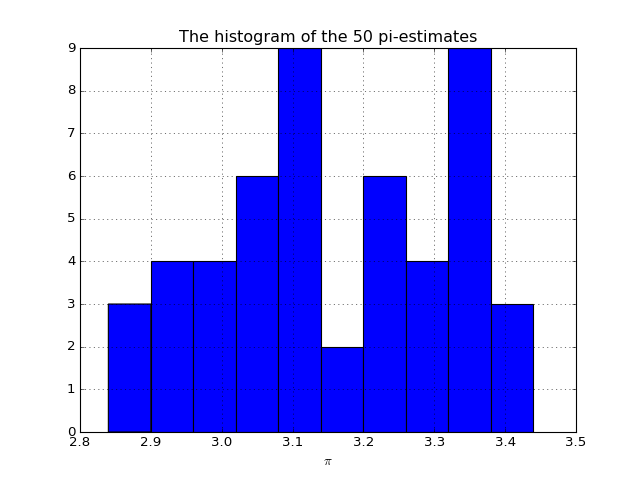

In [3]:
%matplotlib notebook
import matplotlib.pyplot as plt
plt.figure()
plt.hist(pi_est)
plt.grid()
plt.title('The histogram of the 50 pi-estimates')
plt.xlabel('$\pi$')
plt.show()

ii.) Repeat the experiment with different numbers of uniform samples, n (using k=50 for all these runs). Plot the sample variance of the pi-estimates for these different values of n. What is the relationship the
estimate variance and Monte Carlo sample size?

In [4]:
def my_pi_est(sample_size):
    pi_est = []
    for k in range(50):
        sample = np.random.rand(sample_size,2)
        dist = map(np.linalg.norm,sample)
        area = float(sum(np.array(dist) <= 1))/sample_size
        pi_est.append(area*4)
    return pi_est

In [5]:
n_list = np.r_[10:100:10, 100:1000:100, 1000:5000:1000]
sample_var = map(lambda x: np.var(my_pi_est(x)), n_list)

<IPython.core.display.Javascript object>


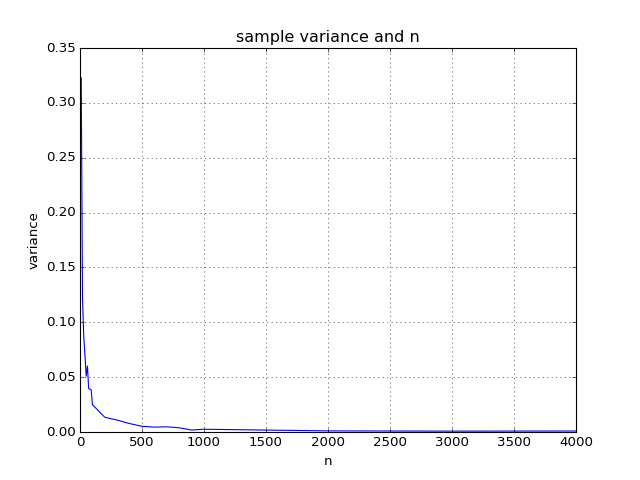

In [6]:
plt.figure()
plt.plot(n_list,sample_var)
plt.title('sample variance and n')
plt.xlabel('n')
plt.ylabel('variance')
plt.grid()
plt.show()

The sample variance decreases with the sample size. 

iii.) Adapt your Monte Carlo solution to provide integral and error estimates for the function:
$$
g(x,y) = \left| 4x - 2 \right| \times \left| 4y -2 \right| \ \ \ \ \ \ \ x,y \ in \ [0,1]
$$

The following figure shows the function $g(x,y)$.

<IPython.core.display.Javascript object>


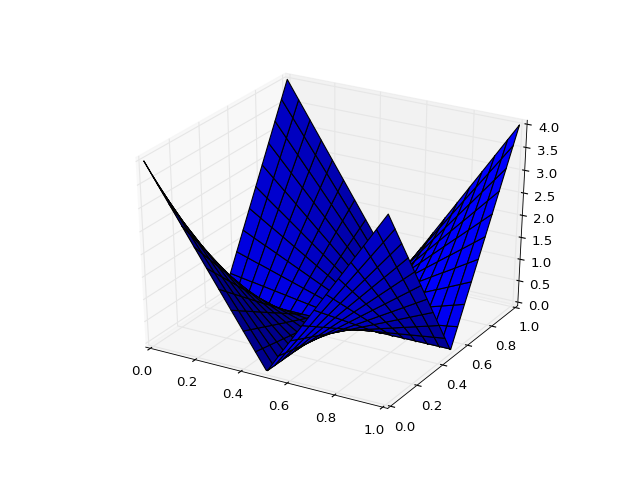

In [7]:
from mpl_toolkits.mplot3d import Axes3D
x = np.linspace(0,1,200)
y = np.linspace(0,1,200)
X, Y = np.meshgrid(x, y)
G = abs(4*X - 2)*abs(4*Y - 2)
fig = plt.figure()
ax = fig.gca(projection='3d')
surf = ax.plot_surface(X, Y, G)
plt.show()

In [8]:
def my_g(xy):
    return abs(4*xy[0] - 2)*abs(4*xy[1] - 2)

In [9]:
SIMULATE_TIMES = 10000
int_result_list = []
for i in range(SIMULATE_TIMES):
    SIMPLE_NUMBER = 100
    sample_xy = np.random.rand(100,2)
    sample_g = map(lambda x: my_g(x),sample_xy)
    int_result = np.average(sample_g)
    int_result_list.append(int_result)
    
print 'The integral result is',np.average(int_result_list)

The integral result is 1.0011931395


Next, we perform the error estimation for it.

There are two ways of error estimation. For the first one, we can use the variance of the 10,000 estimation to indicate the error. The second is using the bootstrapping method to find the confidence interval.

In [10]:
print 'The variance of the simulations is', np.var(int_result_list)

The variance of the simulations is 0.00772669857632


In [14]:
import scikits.bootstrap as bootstrap
import scipy
CIs = bootstrap.ci(data=int_result_list,statfunction=scipy.mean)
print 'The 95% bootstrapping confidence interval is: [',CIs[0],',',CIs[1],']'

The 95% bootstrapping confidence interval is: [ 0.999488848309 , 1.00290364713 ]
